Import pandas and the CSV document

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("WHO-COVID-19-global-data.csv")

Describing the data

In [4]:
df.head(10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-12,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-19,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-26,AF,Afghanistan,EMRO,0,0,0,0
4,2020-02-02,AF,Afghanistan,EMRO,0,0,0,0
5,2020-02-09,AF,Afghanistan,EMRO,0,0,0,0
6,2020-02-16,AF,Afghanistan,EMRO,0,0,0,0
7,2020-02-23,AF,Afghanistan,EMRO,0,0,0,0
8,2020-03-01,AF,Afghanistan,EMRO,1,1,0,0
9,2020-03-08,AF,Afghanistan,EMRO,0,1,0,0


In [5]:
df.describe

<bound method NDFrame.describe of       Date_reported Country_code      Country WHO_region  New_cases  \
0        2020-01-05           AF  Afghanistan       EMRO          0   
1        2020-01-12           AF  Afghanistan       EMRO          0   
2        2020-01-19           AF  Afghanistan       EMRO          0   
3        2020-01-26           AF  Afghanistan       EMRO          0   
4        2020-02-02           AF  Afghanistan       EMRO          0   
...             ...          ...          ...        ...        ...   
49915    2023-11-26           ZW     Zimbabwe       AFRO         48   
49916    2023-12-03           ZW     Zimbabwe       AFRO          0   
49917    2023-12-10           ZW     Zimbabwe       AFRO          0   
49918    2023-12-17           ZW     Zimbabwe       AFRO          0   
49919    2023-12-24           ZW     Zimbabwe       AFRO          0   

       Cumulative_cases  New_deaths  Cumulative_deaths  
0                     0           0                  0  

In [6]:
df.shape

(49920, 8)

In [7]:
df.tail

<bound method NDFrame.tail of       Date_reported Country_code      Country WHO_region  New_cases  \
0        2020-01-05           AF  Afghanistan       EMRO          0   
1        2020-01-12           AF  Afghanistan       EMRO          0   
2        2020-01-19           AF  Afghanistan       EMRO          0   
3        2020-01-26           AF  Afghanistan       EMRO          0   
4        2020-02-02           AF  Afghanistan       EMRO          0   
...             ...          ...          ...        ...        ...   
49915    2023-11-26           ZW     Zimbabwe       AFRO         48   
49916    2023-12-03           ZW     Zimbabwe       AFRO          0   
49917    2023-12-10           ZW     Zimbabwe       AFRO          0   
49918    2023-12-17           ZW     Zimbabwe       AFRO          0   
49919    2023-12-24           ZW     Zimbabwe       AFRO          0   

       Cumulative_cases  New_deaths  Cumulative_deaths  
0                     0           0                  0  
1  

In [8]:
df.isnull().sum()

Date_reported           0
Country_code         1456
Country              1248
WHO_region           4992
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64

In [9]:
print(df.Country.unique())
print(df.Country.nunique())

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bonaire, Saint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' nan 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Côte d'Ivoire" 'Croatia'
 'Cuba' 'Curaçao' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Falkland Islands (Malvinas)'
 'Faroe Islands' 'Fiji' 'Finland' 

Feature Engineering by Changing the Names and Shortening

In [10]:
df['Country'].replace({"Bolivia (Plurinational State of)":"Bolivia", "Democratic Republic of the Congo":"DRC", "Iran (Islamic Republic of)": "Iran", "Kosovo (in accordance with UN Security Council resolution 1244 (1999))": "Kosovo", "Micronesia (Federated States of)": "Micronesia", "Netherlands (Kingdom of the)": "Netherlands", "occupied Palestinian territory, including east Jerusalem": "Palestine", "Republic of Korea": "South Korea", "Republic of Moldova": "Moldova", "Russian Federation": "Russia", "Syrian Arab Republic": "Syria", "United Kingdom of Great Britain and Northern Ireland": "UK and Norther Ireland", "United Arab Emirates": "UAE", "United Republic of Tanzania": "Tanzania", "United States of America": "USA", "United States Virgin Islands": "Virgin Islands", "Venezuela (Bolivarian Republic of)": "Bolivia"}, inplace=True)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
New_cases,49920.0,1.548716e+04,2.395685e+05,-65079.0,0.0,92.0,1892.25,40475477.0
Cumulative_cases,49920.0,1.564601e+06,7.067196e+06,0.0,2545.5,37678.5,450450.75,103436829.0
New_deaths,49920.0,1.400254e+02,8.702406e+02,-3432.0,0.0,0.0,19.00,47687.0
Cumulative_deaths,49920.0,1.852668e+04,7.736311e+04,0.0,18.0,407.0,5927.50,1144877.0


Descriptive Statistics for Kenya

In [12]:
Kenya_Statistics = df[df['Country'] == 'Kenya']

In [13]:
Kenya_Statistics.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,208.000000,208.000000,208.000000,208.000000
mean,1654.298077,221019.543269,27.350962,3838.442308
std,2798.568410,133975.644237,44.240197,2269.857581
min,0.000000,0.000000,0.000000,0.000000
25%,32.000000,96469.250000,0.000000,1677.500000
50%,359.500000,289256.500000,3.000000,5370.000000
75%,2179.000000,342479.250000,37.500000,5688.000000
max,19023.000000,344094.000000,227.000000,5689.000000


In [14]:
Kenya_Statistics.head(10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
23920,2020-01-05,KE,Kenya,AFRO,0,0,0,0
23921,2020-01-12,KE,Kenya,AFRO,0,0,0,0
23922,2020-01-19,KE,Kenya,AFRO,0,0,0,0
23923,2020-01-26,KE,Kenya,AFRO,0,0,0,0
23924,2020-02-02,KE,Kenya,AFRO,0,0,0,0
23925,2020-02-09,KE,Kenya,AFRO,0,0,0,0
23926,2020-02-16,KE,Kenya,AFRO,0,0,0,0
23927,2020-02-23,KE,Kenya,AFRO,0,0,0,0
23928,2020-03-01,KE,Kenya,AFRO,0,0,0,0
23929,2020-03-08,KE,Kenya,AFRO,0,0,0,0


In [15]:
#Remove WHO Region from the data
Kenya_Statistics = Kenya_Statistics.drop(['WHO_region'], axis = 1)
Kenya_Statistics.info

<bound method DataFrame.info of       Date_reported Country_code Country  New_cases  Cumulative_cases  \
23920    2020-01-05           KE   Kenya          0                 0   
23921    2020-01-12           KE   Kenya          0                 0   
23922    2020-01-19           KE   Kenya          0                 0   
23923    2020-01-26           KE   Kenya          0                 0   
23924    2020-02-02           KE   Kenya          0                 0   
...             ...          ...     ...        ...               ...   
24123    2023-11-26           KE   Kenya          0            344094   
24124    2023-12-03           KE   Kenya          0            344094   
24125    2023-12-10           KE   Kenya          0            344094   
24126    2023-12-17           KE   Kenya          0            344094   
24127    2023-12-24           KE   Kenya          0            344094   

       New_deaths  Cumulative_deaths  
23920           0                  0  
23921        

In [16]:
Kenya_Statistics.tail(10)

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
24118,2023-10-22,KE,Kenya,15,344072,0,5689
24119,2023-10-29,KE,Kenya,19,344091,0,5689
24120,2023-11-05,KE,Kenya,3,344094,0,5689
24121,2023-11-12,KE,Kenya,0,344094,0,5689
24122,2023-11-19,KE,Kenya,0,344094,0,5689
24123,2023-11-26,KE,Kenya,0,344094,0,5689
24124,2023-12-03,KE,Kenya,0,344094,0,5689
24125,2023-12-10,KE,Kenya,0,344094,0,5689
24126,2023-12-17,KE,Kenya,0,344094,0,5689
24127,2023-12-24,KE,Kenya,0,344094,0,5689


Plotting the New Infections and Deaths in Kenya

Convert the Dates Reported to the DateTime format

In [17]:
Kenya_Statistics['Date_reported'] = pd.to_datetime(Kenya_Statistics['Date_reported'])
Kenya_Statistics.set_index('Date_reported', inplace=True)

Creating a Plot of the Cases and Deaths being recorded over time

In [18]:
plt.figure(figsize=(15,6))

plt.plot(Kenya_Statistics['Date_reported'], Kenya_Statistics['New_cases'], label = 'New cases', marker = 'o')
plt.plot(Kenya_Statistics['Date_reported'], Kenya_Statistics['New_deaths'], label = 'New deaths', marker = 'o')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Infections and Deaths In Kenya Over Time')
plt.legend()

plt.show()

KeyError: 'Date_reported'

<Figure size 1500x600 with 0 Axes>

Plot of the New Infections over time

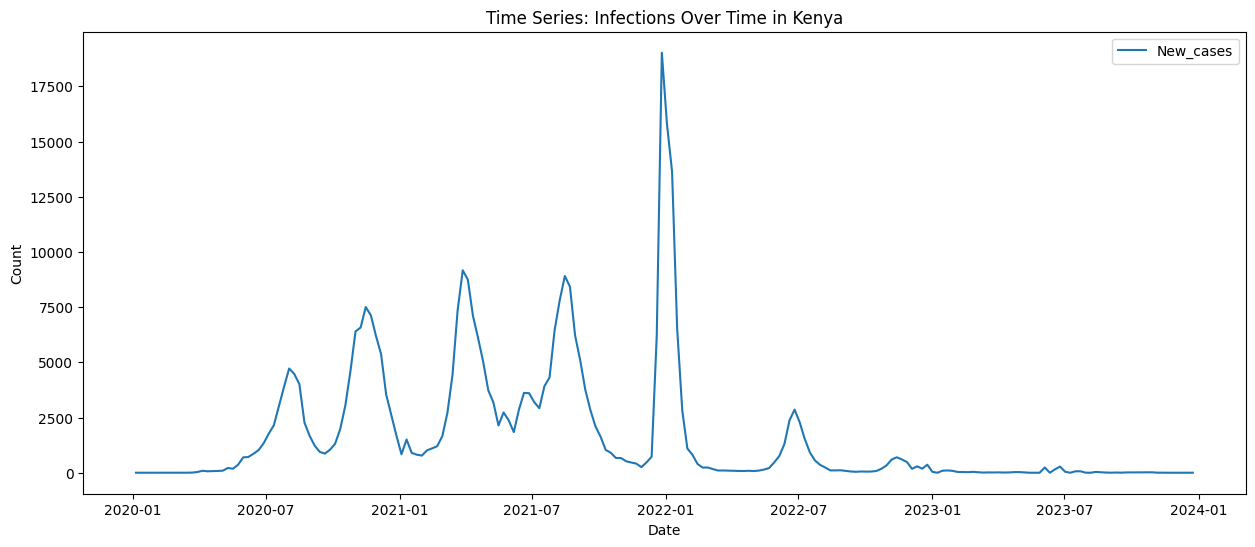

In [ ]:
plt.figure(figsize=(15, 6))
sns.lineplot(x=Kenya_Statistics.index, y='New_cases', data=Kenya_Statistics, label='New_cases')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Time Series: Infections Over Time in Kenya')
plt.legend()
plt.show()

Training, Fitting Using Prophet and Forecasting the next 5 months

22:10:14 - cmdstanpy - INFO - Chain [1] start processing
22:10:14 - cmdstanpy - INFO - Chain [1] done processing


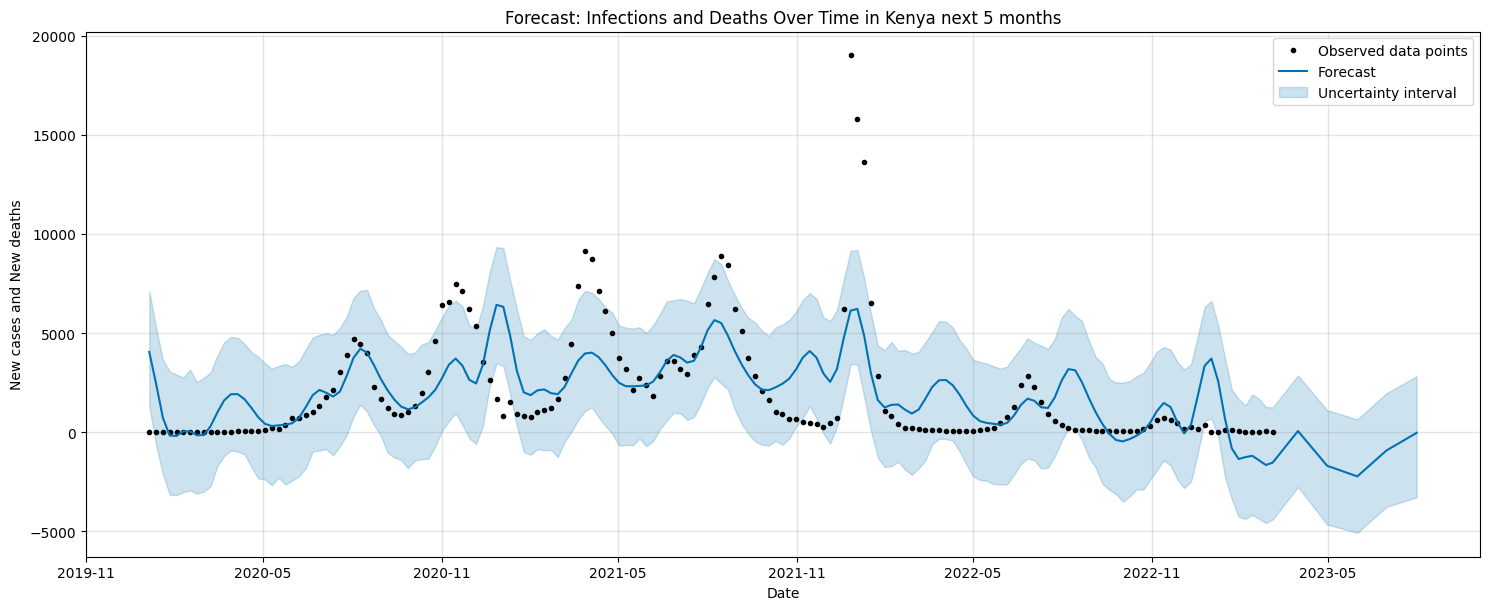

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(Kenya_Statistics, test_size=0.2, shuffle=False)

from prophet import Prophet

train_prophet = train_data.reset_index().rename(columns={'Date_reported': 'ds', 'New_cases': 'y'})

prophet_model = Prophet()
prophet_model.fit(train_prophet)

future = prophet_model.make_future_dataframe(periods=5, freq='M')
forecast = prophet_model.predict(future)

prophet_model.plot(forecast, xlabel='Date', ylabel='New cases and New deaths', figsize=(15, 6))
plt.title('Forecast: Infections and Deaths Over Time in Kenya next 5 months')
plt.legend()
plt.show()


In [ ]:
Kenya_Statistics.head()

,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,
2020-01-05,KE,Kenya,0,0,0,0
2020-01-12,KE,Kenya,0,0,0,0
2020-01-19,KE,Kenya,0,0,0,0
2020-01-26,KE,Kenya,0,0,0,0
2020-02-02,KE,Kenya,0,0,0,0


In [20]:
date_most_infections = Kenya_Statistics['New_cases'].idxmax()
most_infections_count = Kenya_Statistics.loc[date_most_infections, 'New_cases']

date_least_infections = Kenya_Statistics['New_cases'].idxmin()
least_infections_count = Kenya_Statistics.loc[date_least_infections, 'New_cases']

print(f"The date with the most infections in Kenya: {date_most_infections}, Cases: {most_infections_count}")
print(f"The date with the least infections in Kenya: {date_least_infections}, Cases: {least_infections_count}")

The date with the most infections in Kenya: 2021-12-26 00:00:00, Cases: 19023
The date with the least infections in Kenya: 2020-01-05 00:00:00, Cases: 0
